In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("Thyroidp.csv")

# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      429 non-null    int64  
 1   Sex                      429 non-null    int64  
 2   On_thyroxine             429 non-null    int64  
 3   Query_on_thyroxine       429 non-null    int64  
 4   On_antithyroid_medicine  429 non-null    int64  
 5   Sick                     429 non-null    int64  
 6   Pregnant                 429 non-null    int64  
 7   Thyroid_surgery          429 non-null    int64  
 8   I131_treatment           429 non-null    int64  
 9   Query_hypothyroid        429 non-null    int64  
 10  Query_hyperthyroid       429 non-null    int64  
 11  Lithium                  429 non-null    int64  
 12  Goitre                   429 non-null    int64  
 13  Tumor                    429 non-null    int64  
 14  Hypopituitary            4

In [4]:
df.describe()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medicine,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Pysch,TSH,T3,TT4,T4U,FTI,Class
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,...,429.000000,429.000000,429.0,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,49.226107,0.282051,0.114219,0.016317,0.013986,0.060606,0.016317,0.016317,0.025641,0.062937,...,0.002331,0.025641,0.0,0.025641,0.006959,0.019724,0.102483,0.096977,0.107428,2.750583
std,21.079349,0.450524,0.318449,0.126840,0.117570,0.238885,0.126840,0.126840,0.158246,0.243133,...,0.048280,0.158246,0.0,0.158246,0.020461,0.007346,0.038415,0.018163,0.045542,0.564346
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000050,0.002000,0.002900,0.019000,0.002800,1.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000300,0.017000,0.081000,0.088000,0.087000,3.000000
50%,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.001300,0.020600,0.101000,0.098000,0.107000,3.000000
75%,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.002600,0.023000,0.120000,0.103000,0.121000,3.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.183000,0.062000,0.301000,0.182000,0.612000,3.000000


In [5]:
df.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medicine,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Pysch,TSH,T3,TT4,T4U,FTI,Class
0,5,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.061,0.0096,0.0130,0.116,0.0110,1
1,78,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.025,0.0090,0.0500,0.084,0.0600,1
2,73,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.047,0.0110,0.0520,0.090,0.0580,1
3,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.070,0.0050,0.0029,0.104,0.0028,1
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.031,0.0080,0.0130,0.119,0.0110,1


In [6]:
df.isnull().sum() # checking for null values in dataset

Age                        0
Sex                        0
On_thyroxine               0
Query_on_thyroxine         0
On_antithyroid_medicine    0
Sick                       0
Pregnant                   0
Thyroid_surgery            0
I131_treatment             0
Query_hypothyroid          0
Query_hyperthyroid         0
Lithium                    0
Goitre                     0
Tumor                      0
Hypopituitary              0
Pysch                      0
TSH                        0
T3                         0
TT4                        0
T4U                        0
FTI                        0
Class                      0
dtype: int64

In [7]:
column = ['Lithium','Goitre','Hypopituitary']

In [8]:
df.drop(columns=column,axis=1,inplace=True)

<AxesSubplot: >

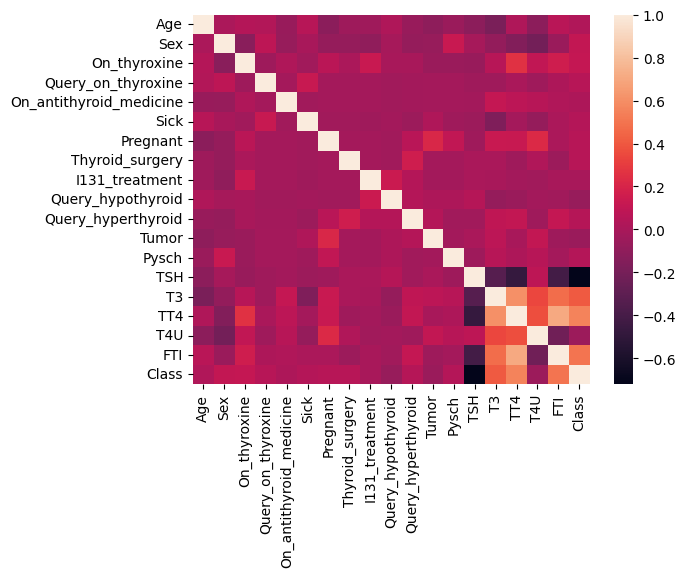

In [9]:
sns.heatmap(df.corr())

In [10]:
df.head(10)

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medicine,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Tumor,Pysch,TSH,T3,TT4,T4U,FTI,Class
0,5,0,1,0,0,0,0,0,1,0,0,0,0,0.06100,0.0096,0.0130,0.116,0.0110,1
1,78,0,0,0,0,0,0,0,0,1,0,0,0,0.02500,0.0090,0.0500,0.084,0.0600,1
2,73,0,0,0,0,0,0,0,0,0,0,0,0,0.04700,0.0110,0.0520,0.090,0.0580,1
3,43,0,0,0,0,0,0,0,0,0,0,0,0,0.07000,0.0050,0.0029,0.104,0.0028,1
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0.03100,0.0080,0.0130,0.119,0.0110,1
5,53,0,0,0,0,0,0,0,0,0,0,0,0,0.02500,0.0040,0.0390,0.061,0.0640,1
6,51,0,0,0,0,0,0,0,0,0,0,0,0,0.02400,0.0040,0.0030,0.099,0.0030,1
7,4,0,0,0,0,0,0,0,0,0,0,0,0,0.04200,0.0020,0.0048,0.090,0.0054,1
8,6,0,0,0,0,0,0,0,0,0,0,0,0,0.00809,0.0180,0.0590,0.096,0.0610,1
9,69,0,0,0,0,0,0,0,0,0,0,0,0,0.02000,0.0100,0.0510,0.084,0.0610,1


In [11]:
df['Class'].value_counts()

3    350
2     51
1     28
Name: Class, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='count'>

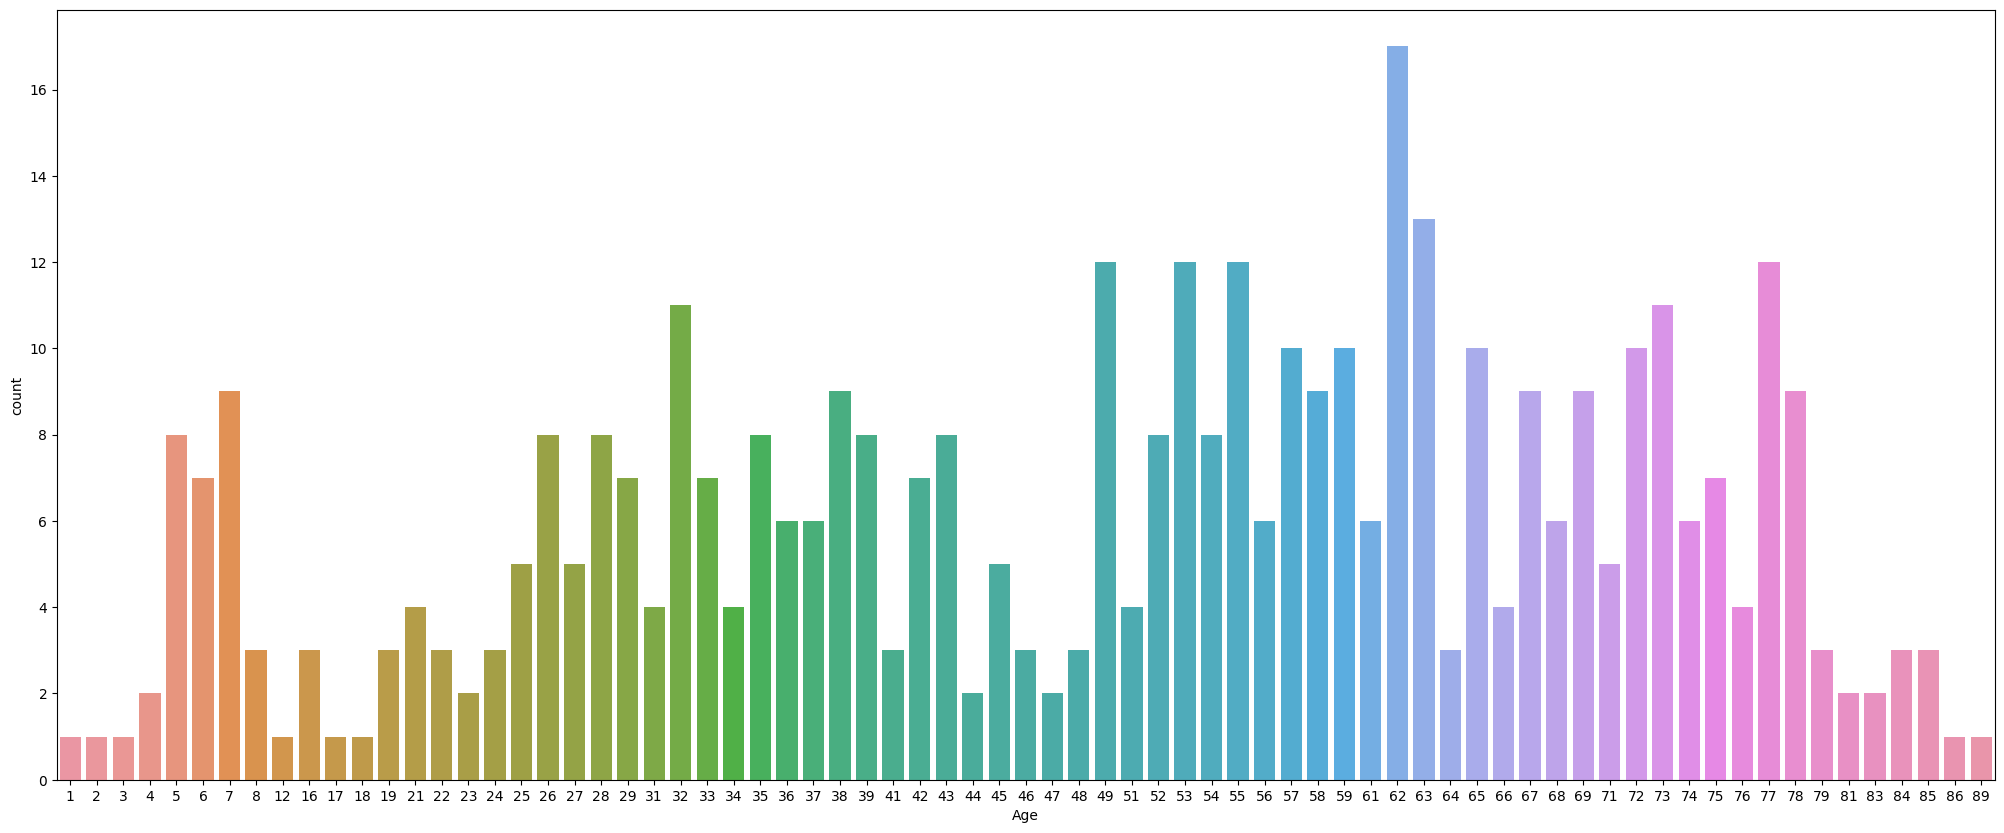

In [12]:
plt.figure(figsize=(25,10))
sns.countplot(x='Age',data=df)

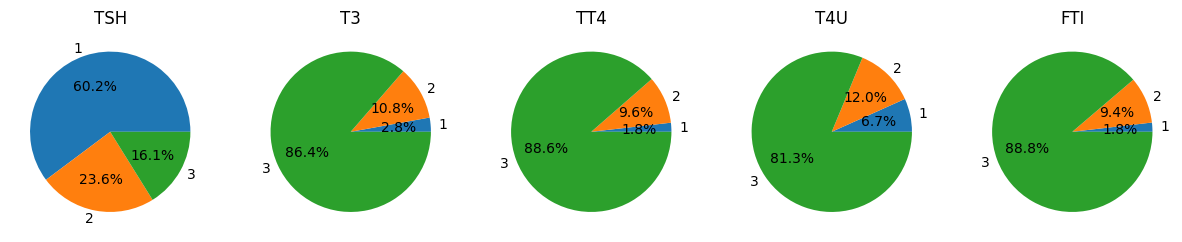

In [13]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5)
fig.set_size_inches(15, 10)
ax1.pie(df.groupby('Class')['TSH'].sum(),autopct='%.1f%%',labels=[1,2,3])
ax1.set_title('TSH')
ax2.pie(df.groupby('Class')['T3'].sum(),autopct='%.1f%%',labels=[1,2,3])
ax2.set_title('T3')
ax3.pie(df.groupby('Class')['TT4'].sum(),autopct='%.1f%%',labels=[1,2,3])
ax3.set_title('TT4')
ax4.pie(df.groupby('Class')['T4U'].sum(),autopct='%.1f%%',labels=[1,2,3])
ax4.set_title('T4U')
ax5.pie(df.groupby('Class')['FTI'].sum(),autopct='%.1f%%',labels=[1,2,3])
ax5.set_title('FTI')
plt.show()

# training And testing model

#### here target column is class
- All other remaining column are in training

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Class',axis='columns'),df.Class,test_size=0.2,random_state=0)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(n_estimators=200)

In [18]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [19]:
pred = rfc.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
print(confusion_matrix(Y_test,pred))

[[ 7  1  0]
 [ 0 11  0]
 [ 0  1 66]]


In [22]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.85      1.00      0.92        11
           3       1.00      0.99      0.99        67

    accuracy                           0.98        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.98      0.98      0.98        86



Text(0.5, 1.0, 'Original Value graph')

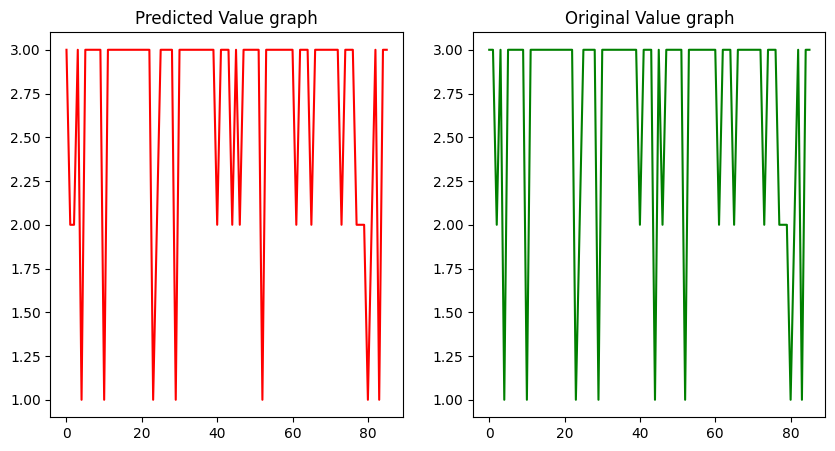

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
ax1.plot(np.arange(len(pred)), pred, color='red', label='Predicted')
ax1.set_title('Predicted Value graph')

# add actual values to the plot, if you have them
ax2.plot(np.arange(len(Y_test)), Y_test, color='green', label='Actual')
ax2.set_title('Original Value graph')


In [24]:
df.columns.tolist()

['Age',
 'Sex',
 'On_thyroxine',
 'Query_on_thyroxine',
 'On_antithyroid_medicine',
 'Sick',
 'Pregnant',
 'Thyroid_surgery',
 'I131_treatment',
 'Query_hypothyroid',
 'Query_hyperthyroid',
 'Tumor',
 'Pysch',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'Class']

In [25]:
X1 = df[['Age',
 'Sex',
 'On_thyroxine',
 'Query_on_thyroxine',
 'On_antithyroid_medicine',
 'Sick',
 'Pregnant',
 'Thyroid_surgery',
 'I131_treatment',
 'Query_hypothyroid',
 'Query_hyperthyroid',
 'Tumor',
 'Pysch',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',]].values
Y1 = df['Class'].values

# Pass 1

In [26]:
dff = pd.DataFrame(columns=['Partition','MSE','MAE','RMSE','Accuracy']) # creating empty data frame with some column

In [27]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np

# Load your dataset here
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    accuracy = metrics.r2_score(y_test,y_pred)
    row = [i+1,mse,mae,rmse,accuracy]
    print(f"Mean squared error: {mse}")
    print("mean absolute error: ",metrics.mean_absolute_error(y_test,y_pred))
    print('Root mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("Accuracy: ",r2_score(y_test,y_pred))
    dff.loc[len(dff)] = row 

    print('-'*25)


Partition 1:
Mean squared error: 0.005861627906976744
mean absolute error:  0.022209302325581392
Root mean squared error:  0.07656126897444128
Accuracy:  0.9859290490100616
-------------------------
Partition 2:
Mean squared error: 0.02498372093023256
mean absolute error:  0.03302325581395348
Root mean squared error:  0.15806239568674316
Accuracy:  0.922912140175219
-------------------------
Partition 3:
Mean squared error: 0.0005604651162790693
mean absolute error:  0.004883720930232549
Root mean squared error:  0.0236741444677325
Accuracy:  0.9978466493506494
-------------------------
Partition 4:
Mean squared error: 0.00413953488372093
mean absolute error:  0.012325581395348836
Root mean squared error:  0.06433921730733853
Accuracy:  0.9865008818342151
-------------------------
Partition 5:
Mean squared error: 0.00039058823529411707
mean absolute error:  0.003999999999999988
Root mean squared error:  0.019763305272502297
Accuracy:  0.9985037115588548
-------------------------


In [28]:
dff

,Partition,MSE,MAE,RMSE,Accuracy
0,1.0,0.005862,0.022209,0.076561,0.985929
1,2.0,0.024984,0.033023,0.158062,0.922912
2,3.0,0.000560,0.004884,0.023674,0.997847
3,4.0,0.004140,0.012326,0.064339,0.986501
4,5.0,0.000391,0.004000,0.019763,0.998504


# Pass 2

In [29]:
df3 = pd.DataFrame(columns=['Partition','Sub partition','MSE','MAE','RMSE','Accuracy']) # creating an empty Dataframe with some columns

In [30]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset here
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
# print(indices)
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the model on different partitions
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the machine learning model on the training set
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Test the machine learning model on the remaining partitions
    for j, (train_index2, test_index2) in enumerate(kf.split(X)):
        if j != i:
            X_train2, X_test2 = X[train_index2], X[test_index2]
            y_train2, y_test2 = y[train_index2], y[test_index2]
            y_pred = model.predict(X_test2)
            mse = mean_squared_error(y_test2, y_pred)
            mae = metrics.mean_absolute_error(y_test2,y_pred)
            rmse = np.sqrt(metrics.mean_squared_error(y_test2,y_pred))
            accuracy = metrics.r2_score(y_test2,y_pred)
            print(f"Partition {j+1} Mean squared error: {mse}")
            print(f"Partition {j+1}","Mean absolute error: ", metrics.mean_absolute_error(y_test2,y_pred))
            print(f"Partition {j+1}","Root Mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test2,y_pred)))
            print(f"Partition {j+1}","Accuracy: ", metrics.r2_score(y_test2,y_pred))
            row = [i+1,j+1,mse,mae,rmse,accuracy]
            df3.loc[len(df3)] = row # inserting evaluation data in a dataframe          
            print("-"*50)
    print("-"*25)

Partition 1:
Partition 2 Mean squared error: 0.004153488372093021
Partition 2 Mean absolute error:  0.014651162790697664
Partition 2 Root Mean squared error:  0.06444756296473142
Partition 2 Accuracy:  0.9871843137254902
--------------------------------------------------
Partition 3 Mean squared error: 0.0001174418604651155
Partition 3 Mean absolute error:  0.002674418604651152
Partition 3 Root Mean squared error:  0.010837059585750902
Partition 3 Accuracy:  0.9995487792207792
--------------------------------------------------
Partition 4 Mean squared error: 0.0008069767441860469
Partition 4 Mean absolute error:  0.006744186046511621
Partition 4 Root Mean squared error:  0.028407336098023112
Partition 4 Accuracy:  0.997368430335097
--------------------------------------------------
Partition 5 Mean squared error: 0.00017058823529411752
Partition 5 Mean absolute error:  0.003176470588235292
Partition 5 Root Mean squared error:  0.0130609431242203
Partition 5 Accuracy:  0.999346500530222

# Visualization

In [31]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [32]:
df3

,Partition,Sub partition,MSE,MAE,RMSE,Accuracy
0,1.0,2.0,0.004153,0.014651,0.064448,0.987184
1,1.0,3.0,0.000117,0.002674,0.010837,0.999549
2,1.0,4.0,0.000807,0.006744,0.028407,0.997368
3,1.0,5.0,0.000171,0.003176,0.013061,0.999347
4,2.0,1.0,0.001514,0.006744,0.038910,0.996366
5,2.0,3.0,0.000005,0.000233,0.002157,0.999982
6,2.0,4.0,0.002709,0.006512,0.052051,0.991165
7,2.0,5.0,0.000015,0.000588,0.003911,0.999941
8,3.0,1.0,0.000229,0.003140,0.015135,0.999450
9,3.0,2.0,0.004317,0.013605,0.065707,0.986678


In [33]:
dff

,Partition,MSE,MAE,RMSE,Accuracy
0,1.0,0.005862,0.022209,0.076561,0.985929
1,2.0,0.024984,0.033023,0.158062,0.922912
2,3.0,0.000560,0.004884,0.023674,0.997847
3,4.0,0.004140,0.012326,0.064339,0.986501
4,5.0,0.000391,0.004000,0.019763,0.998504


In [34]:
dff.iplot(kind='bar',x='Partition',y='MSE',title='Mean Squared Error in Partitions: Pass 1',xTitle='Partitions',yTitle='mean_squared_error')


In [35]:
dff.iplot(kind='bar',x='Partition',y='MAE',title='Mean Absolute Error in Partitions: Pass 1',xTitle='Partitions',yTitle='mean_squared_error')


In [36]:
dff.iplot(kind='bar',x='Partition',y='RMSE',title='Root Mean Squared Error in Partitions: Pass 1',xTitle='Partitions',yTitle='mean_squared_error')


In [37]:
dff.iplot(kind='bar',x='Partition',y='Accuracy',title='Accuracy in Partitions: Pass 1',xTitle='Partitions',yTitle='mean_squared_error')


In [38]:
dff.iplot(kind='bar',x='Partition',y='MSE',title='Evaluations in Every Partitions: Pass 1',xTitle='Partitions',yTitle='mean_squared_error', categories="Partition")


In [39]:
df3.iplot(kind='bubble',x='Partition',y='MSE',size='Sub partition',categories="Sub partition",title="Mean Squared Error in Each Partion: Pass 2")

c:\Users\anuku\miniconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

c:\Users\anuku\miniconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [40]:
df3.scatter_matrix()

In [41]:
dff.iplot(kind='surface', x='Partition',y='MSE',color='rainbow')

In [42]:
df3.iplot(kind='bubble',x='Partition',y='MAE',size='Sub partition',categories="Sub partition",title="Mean Absolute Error in Each Partion: Pass 2")


c:\Users\anuku\miniconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

c:\Users\anuku\miniconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [43]:
df3.iplot(kind='bubble',x='Partition',y='RMSE',size='Sub partition',categories="Sub partition",title="Root Mean Squared Error in Each Partion: Pass 2")


In [48]:
df3.iplot(kind='bubble',x='Partition',y='Accuracy',size='Sub partition',categories="Sub partition",title="Accuracy in Each Partion: Pass 2")
